## Observations and Insights

After 45 days of tumor growth measurements under several Treatment Regimens I observed:

Based on (mean) measure of central tendency's Drug Regime: Naftisol, Placebo & Stelasyn got the highest Tumor Growth Average of around 54 (mm3). On the other hand, Ramicane got the lowest Tumor Growth Average of about 40.21. So Ramicane was the better treatment regimen applied  on mice over 45 days of measurement.

The box plot graphic confirms us that Ramicane got the better results on controlling the Tumor Growth as well as Capumulin. But Ramicane must be reviewed closely to find out why and how it got the some TGA around 40.21. It might help to continue improving its own process and be a reference for other treatments. Anyways Ramicame is confirming the lead of this treatment regiments over this period based on this graphics.

The scatter plot graphic shows the correlation between Weight (g) and Tumor Volume (mm3) for Capumulin treatment, based on this plot, I can observe that for those mice that are over 22 weight,  the tumor growth results are increasing up to 46 tumor volume (mm3), and for those mice under 22 weight the tumor growth results are decreasing  all the way long  up to 16 tumor volume (mm3). I can say that weight’s mice are potentially a factor the must be taken in consideration in the tumor growth regiment treatment (More weight on a mouse more tumor growth as a result).




## Dependencies and starter code

In [128]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress
from sklearn import datasets


# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

In [114]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


## Summary statistics

In [115]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [116]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
study_results.rename(columns = {'Tumor Volume (mm3)':'Total_vol'}, inplace = True)  
# Step 1 Get the the measures of central tendency
v_tumor_vol_df = study_results['Total_vol']
v_tumor_mean = np.mean(v_tumor_vol_df)
v_tumor_median= np.median(v_tumor_vol_df)
v_tumor_mode = st.mode(v_tumor_vol_df)
v_tumor_var= np.var(v_tumor_vol_df,ddof = 0)
v_tumor_std = np.std(v_tumor_vol_df,ddof = 0)
v_tumor_sem =sem(study_results.Total_vol)


data_list = {'Mean':[v_tumor_mean], 'Median':[v_tumor_median],
              'Variance':[v_tumor_var],'Standar Deviation':[v_tumor_std],
              'SEM':[v_tumor_sem]}
summary_df = pd.DataFrame(data_list) 
#summary_df.head(10)
# Step 2 display a df summary table
summary_df.head(10).style.format({"Mean":"{:20,.2f}","Median":"{:20,.2f}",
                                 "Variance":"{:20,.2f}","Standar Deviation":"{:20,.2f}"
                                 ,                                 "SEM":"{:20,.4f}"
                                 })



,Mean,Median,Variance,Standar Deviation,SEM
0,50.45,48.95,79.07,8.89,0.2044


In [127]:
# By regime
new_t1_df  = pd.merge (study_results,mouse_metadata, how='left', on=['Mouse ID'])
new_t1_df
zz = new_t1_df.groupby(by=["Drug Regimen"]).agg(v_median = ('Total_vol' , 'median'),
                                                  v_mean = ('Total_vol' , 'mean'),
                                                  v_std = ('Total_vol' , np.std),
                                                  )
zz.head(10)

,v_median,v_mean,v_std
Drug Regimen,,,
Capomulin,41.557809,40.675741,4.994774
Ceftamin,51.776157,52.591172,6.268188
Infubinol,51.820584,52.884795,6.567243
Ketapril,53.698743,55.235638,8.279709
Naftisol,52.509285,54.331565,8.134708
Placebo,52.288934,54.033581,7.821003
Propriva,50.854632,52.322552,6.507770
Ramicane,40.673236,40.216745,4.846308
Stelasyn,52.431737,54.233149,7.710419


## Bar plots

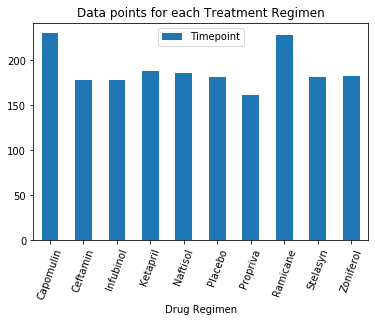

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# step 1 merge 2 df 
new_t_df  = pd.merge (study_results,mouse_metadata, how='left', on=['Mouse ID'])
# step 2 select columns needed and group it
val_columns_df =new_t_df[['Drug Regimen','Mouse ID','Timepoint']]
# step 3 group by regime and convent this results in to a df
return_a_df = pd.DataFrame({'Timepoint' : val_columns_df.groupby( ['Drug Regimen'] ).size()}).reset_index()
return_a_df
#step 3  Create a bar plot
return_a_df.plot.bar(x="Drug Regimen", y="Timepoint", rot=70, title="Data points for each Treatment Regimen");


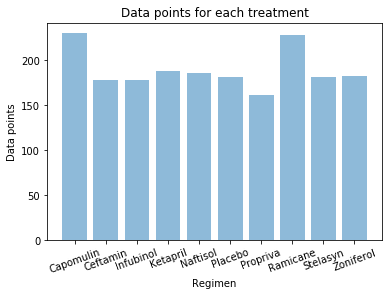

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# step 1 merge 2 df 
new_t_df  = pd.merge (study_results,mouse_metadata, how='left', on=['Mouse ID'])
# step 2 select columns needed and group it
val_columns_df =new_t_df[['Drug Regimen','Mouse ID','Timepoint']]
# step 3 group by regime and convent this results in to a df
return_a_df = pd.DataFrame({'Timepoint' : val_columns_df.groupby( ['Drug Regimen'] ).size()}).reset_index()
return_a_df['Timepoint']
# step 4 bar plot
regimen = return_a_df['Drug Regimen']
y_pos = np.arange(len(regimen))
dpoints = return_a_df['Timepoint']
plt.bar(y_pos, dpoints, align='center', alpha=0.5)
plt.xticks(y_pos, regimen, rotation=20)
plt.ylabel('Data points')
plt.xlabel('Regimen')
plt.title('Data points for each treatment')
plt.show()

## Pie plots

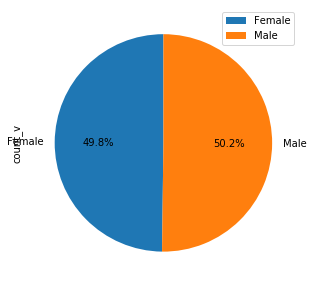

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
return_a_df = pd.DataFrame({'count_v' : mouse_metadata.groupby( ["Sex"] ).size()}).reset_index()
#return_a_df
labels = return_a_df["Sex"]
return_a_df.plot.pie(y='count_v',labels=labels,figsize=(5, 5),autopct='%1.1f%%', startangle=90)



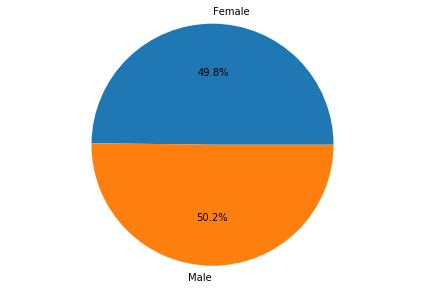

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gen_val_df =mouse_metadata.groupby("Sex").size()
# Convert a gropy data to a data frame
return_a_df = pd.DataFrame({'count_v' : mouse_metadata.groupby( ["Sex"] ).size()}).reset_index()
#return_a_df["count_v"]
# Create a pie chart
plt.pie(return_a_df["count_v"]  , labels=return_a_df['Sex'],autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()


# Quartiles, outliers and boxplots

In [9]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens:
#Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively
#determine  if there are any potential outliers across all four treatment regimens.

In [10]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
#step 1 Select the data set to work with
o_new_t_df  = pd.merge (study_results,mouse_metadata, how='left', on=['Mouse ID'])
#new_t_df
val_o_columns_df = o_new_t_df[['Drug Regimen','Mouse ID','Timepoint','Total_vol']]
val_o_columns_df

# Step 2 Get the final tumor volume of each mouse for centain regimens and get the final tumor volume
options=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
val_o1_columns_df = val_o_columns_df[val_o_columns_df['Drug Regimen'].isin(options)] 
val_o2_columns_df = val_o1_columns_df[val_o1_columns_df['Timepoint']==45] 
val_o2_columns_df
# Step 3 Calculate the quartiles and IQR and quantitatively
v_tot_vol = val_o2_columns_df['Total_vol']

quartiles = v_tot_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print("Results:")
print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


Results:
The lower quartile of tumor volume is: 33.48002734
The upper quartile of tumor volume is: 62.14221369
The interquartile range of tumor volume is: 28.66218635
The the median of tumor volume is: 40.1592203 
Values below -9.513252184999999 could be outliers.
Values above 105.135493215 could be outliers.


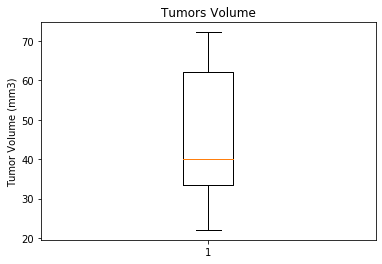

In [11]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors Volume')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(v_tot_vol)
plt.show()

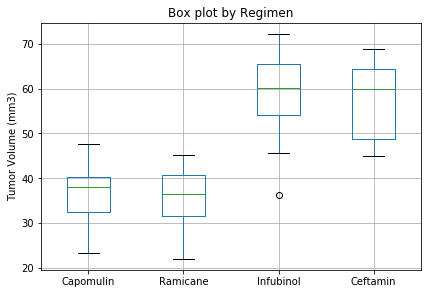

In [81]:
#step 1 Select the data set to work with
o_new_t_df  = pd.merge (study_results,mouse_metadata, how='left', on=['Mouse ID'])
#new_t_df
val_o_columns_df = o_new_t_df[['Drug Regimen','Mouse ID','Timepoint','Total_vol']]
val_o_columns_df

# Step 2 Get the final tumor volume of each mouse for centain regimens and get the final tumor volume
# For Capomulin
options=['Capomulin']#, 'Ramicane', 'Infubinol','Ceftamin']
val_o1_columns_df = val_o_columns_df[val_o_columns_df['Drug Regimen'].isin(options)] 
val_o1_columns_df
return_a_df = pd.DataFrame({'Timepoint' :val_o1_columns_df.groupby(['Drug Regimen','Mouse ID'], sort=False)['Timepoint'].max()}).reset_index()
#return_a_df
v_merge_maxtime_df  = pd.merge (return_a_df,val_o1_columns_df, how='left', on=['Drug Regimen','Mouse ID','Timepoint'])
##v_merge_maxtime_df 
v_merge_maxtime_df.rename(columns = {'Total_vol':'Capomulin'}, inplace = True)
xxy=v_merge_maxtime_df.drop(['Drug Regimen','Mouse ID','Timepoint'], axis = 1)
#xxy


#Ramicane
qoptions=['Ramicane']#, 'Ramicane', 'Infubinol','Ceftamin']
qval_o1_columns_df = val_o_columns_df[val_o_columns_df['Drug Regimen'].isin(qoptions)] 
qval_o1_columns_df
qreturn_a_df = pd.DataFrame({'Timepoint' :qval_o1_columns_df.groupby(['Drug Regimen','Mouse ID'], sort=False)['Timepoint'].max()}).reset_index()
qreturn_a_df
qv_merge_maxtime_df  = pd.merge (qreturn_a_df,qval_o1_columns_df, how='left', on=['Drug Regimen','Mouse ID','Timepoint'])
qv_merge_maxtime_df 
qv_merge_maxtime_df.rename(columns = {'Total_vol':'Ramicane'}, inplace = True)  
qv_merge_maxtime_df
qxxy=qv_merge_maxtime_df.drop(['Drug Regimen','Mouse ID','Timepoint'], axis = 1)
qxxy

#Infubinol

options_in=['Infubinol']#, 'Ramicane', 'Infubinol','Ceftamin']
val_in_columns_df = val_o_columns_df[val_o_columns_df['Drug Regimen'].isin(options_in)] 
val_in_columns_df
return_in_df = pd.DataFrame({'Timepoint' :val_in_columns_df.groupby(['Drug Regimen','Mouse ID'], sort=False)['Timepoint'].max()}).reset_index()
return_in_df
v_merge_in_maxtime_df  = pd.merge (return_in_df,val_in_columns_df, how='left', on=['Drug Regimen','Mouse ID','Timepoint'])
v_merge_in_maxtime_df 
v_merge_in_maxtime_df.rename(columns = {'Total_vol':'Infubinol'}, inplace = True)  
v_merge_in_maxtime_df
xxin=v_merge_in_maxtime_df.drop(['Drug Regimen','Mouse ID','Timepoint'], axis = 1)
xxin

#Ceftamin

options_ce=['Ceftamin']#, 'Ramicane', 'Infubinol','Ceftamin']
val_ce_columns_df = val_o_columns_df[val_o_columns_df['Drug Regimen'].isin(options_ce)] 
val_ce_columns_df
return_ce_df = pd.DataFrame({'Timepoint' :val_ce_columns_df.groupby(['Drug Regimen','Mouse ID'], sort=False)['Timepoint'].max()}).reset_index()
return_ce_df
v_merge_ce_maxtime_df  = pd.merge (return_ce_df,val_ce_columns_df, how='left', on=['Drug Regimen','Mouse ID','Timepoint'])
v_merge_ce_maxtime_df 
v_merge_ce_maxtime_df.rename(columns = {'Total_vol':'Ceftamin'}, inplace = True)  
v_merge_ce_maxtime_df
xxce=v_merge_ce_maxtime_df.drop(['Drug Regimen','Mouse ID','Timepoint'], axis = 1)
xxce


# merge regime values

zv_merge_maxtime_df = xxy.merge(qxxy, left_index=True, right_index=True)
w1 =zv_merge_maxtime_df.merge(xxin, left_index=True, right_index=True)
w2 =w1.merge(xxce, left_index=True, right_index=True)
#w2
# box plot summary

fig = plt.figure(figsize=(15,10))
ax1 =fig.add_subplot(2,2,1)
ax1.set_title('Box plot by Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
w2.boxplot(ax = ax1)
#w2
plt.show()



## Line and scatter plots

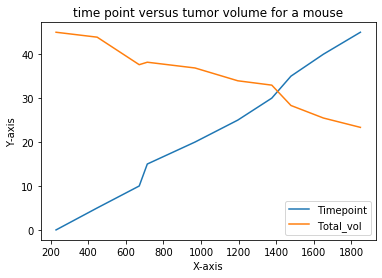

In [83]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#step 1 get the data (columns to work with)
new_t_df  = pd.merge (study_results,mouse_metadata, how='left', on=['Mouse ID'])
#new_t_df
# step 2 select columns needed and group it
val_columns_df = new_t_df[['Drug Regimen','Mouse ID','Timepoint','Total_vol']]
val_columns_df=val_columns_df.loc[(val_columns_df['Drug Regimen'] == 'Capomulin') &
               (val_columns_df['Mouse ID'] == 's185')]
val_columns_df
val_columns_df = val_columns_df[['Mouse ID','Timepoint','Total_vol']]
val_columns_df.plot.line()
plt.title("time point versus tumor volume for a mouse")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
#plt.show()


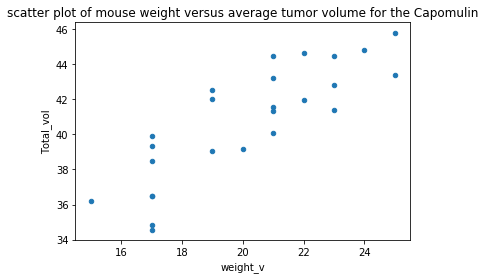

In [84]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#step 1 get weight mouse data from mouse df
mouse_df= mouse_metadata[['Drug Regimen','Mouse ID','Weight (g)']]
v_m_weight_df = mouse_df.loc[(mouse_df['Drug Regimen'] == 'Capomulin')]
#new_t_df =new_t_df.groupby(new_t_df['Drug Regimen'])
#v_m_weight_df         
#step 2 get average tumor volume from results df
new_t_df  = pd.merge (study_results,mouse_metadata, how='left', on=['Mouse ID'])
new_t_df  = new_t_df[['Drug Regimen','Mouse ID','Total_vol']]
v_m_tvol_df = new_t_df.loc[(new_t_df['Drug Regimen'] == 'Capomulin')]
# Grouping data and getting the avg
v_grp = v_m_tvol_df.groupby(['Drug Regimen', 'Mouse ID']) 
v_avg_tvol = pd.DataFrame(v_grp['Total_vol'].mean())
v_avg_tvol 
# step 3 merge 2 df
v_sum_wv_df = pd.merge(v_m_weight_df ,v_avg_tvol, on='Mouse ID')
v_sum_wv_df
# step 4 plot scatter
v_sum_wv_df.rename(columns = {'Weight (g)':'weight_v'}, inplace = True)  
#v_sum_wv_df
# Draw a scatter plot
v_sum_wv_df.plot.scatter(x='weight_v', y='Total_vol', title= 
                         "scatter plot of mouse weight versus average tumor volume for the Capomulin");
plt.show(block=True);


In [85]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
#v_sum_wv_df
v_weight = v_sum_wv_df.iloc[:,2]
v_tvol = v_sum_wv_df.iloc[:,3]
correlation = st.pearsonr(v_weight,v_tvol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


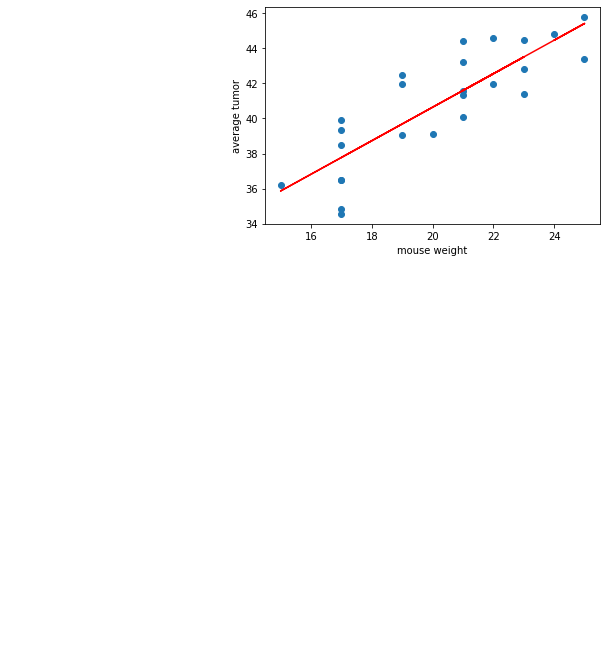

In [86]:
# linear regression equation and line to plot
x_values = v_sum_wv_df['weight_v']
y_values = v_sum_wv_df['Total_vol']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('mouse weight')
plt.ylabel('average tumor')
plt.show()